# Compare Surface Roughness

### Import Library

In [150]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import cv2
import io
import base64 
import glob
import os
import numpy as np
import matplotlib.image as img
from PIL import Image

### Loaded Image

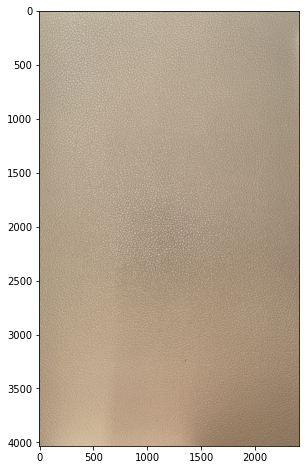

In [142]:
cwd = os.getcwd()
imgPath = cwd+'/DataImage/Leatherette.jpg'
testImg = img.imread(imgPath)
plt.figure(figsize=(8,8))
plt.imshow(testImg)
plt.show()

### Convert to GrayScale using HSI

(4032, 2406)


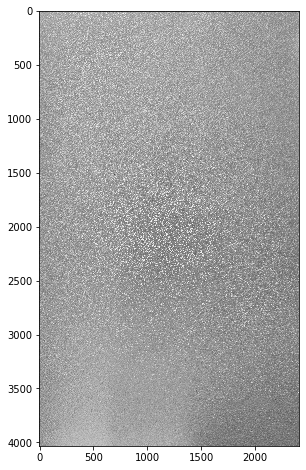

In [143]:
testGray = np.zeros((testImg.shape[0],testImg.shape[1]))
print(testGray.shape)
testGray = testImg[:,:,0]/3+testImg[:,:,1]/3+testImg[:,:,2]/3
testGray = testGray/255
plt.figure(figsize=(8,8))
# plt.imshow(testGray)
plt.imshow(testGray, cmap='gray', vmin=0, vmax=1, interpolation='none')
plt.show()

### Define a function to compute forward average - vertical

In [144]:
def compute_average_vertical_forward(I):
    
    D = I[:-1,:]
    I_forward = I[1:,:]
    D = (I_forward+D)/2
    
    return D

### Define a function to compute forward average - horizontal

In [145]:
def compute_average_horizontal_forward(I):
    
    D = I[:,:-1]
    I_forward = I[:,1:]
    D = (I_forward+D)/2
    
    return D

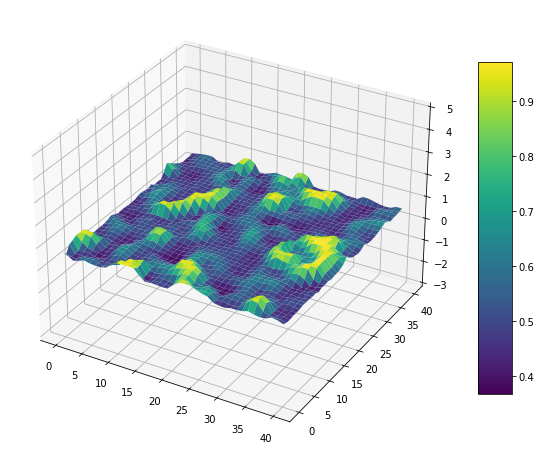

In [180]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')

cutted_width = testGray.shape[1]//2
cutted_height = testGray.shape[0]//2
tile_size = 20
Z = testGray[cutted_height-tile_size:cutted_height+tile_size,cutted_width-tile_size:cutted_width+tile_size]

x = np.linspace(0,Z.shape[1],Z.shape[1])
y = np.linspace(0,Z.shape[0],Z.shape[0])
X, Y = np.meshgrid(x,y)


surf = ax.plot_surface(X, Y, Z, cmap='viridis')
fig.colorbar(surf, shrink=0.6, aspect=10)
ax.set_zlim(-3, 5)

plt.tight_layout()

In [157]:
print(max(Z[2]))

0.5902320912702081
